# PART 1 DATA ANALYSIS AND NAIVE BAYES CLASSIFIER


For this portfolio, I decided to take Brain tumor dataset from https://www.kaggle.com/preetviradiya/brian-tumor-dataset. The aim was to correctly predict from an MRI whether it is healthy or a tumor. The reason for choosing this dataset is because of interest in computer vision related problems. 

Steps involved. (Image from live lecture.)

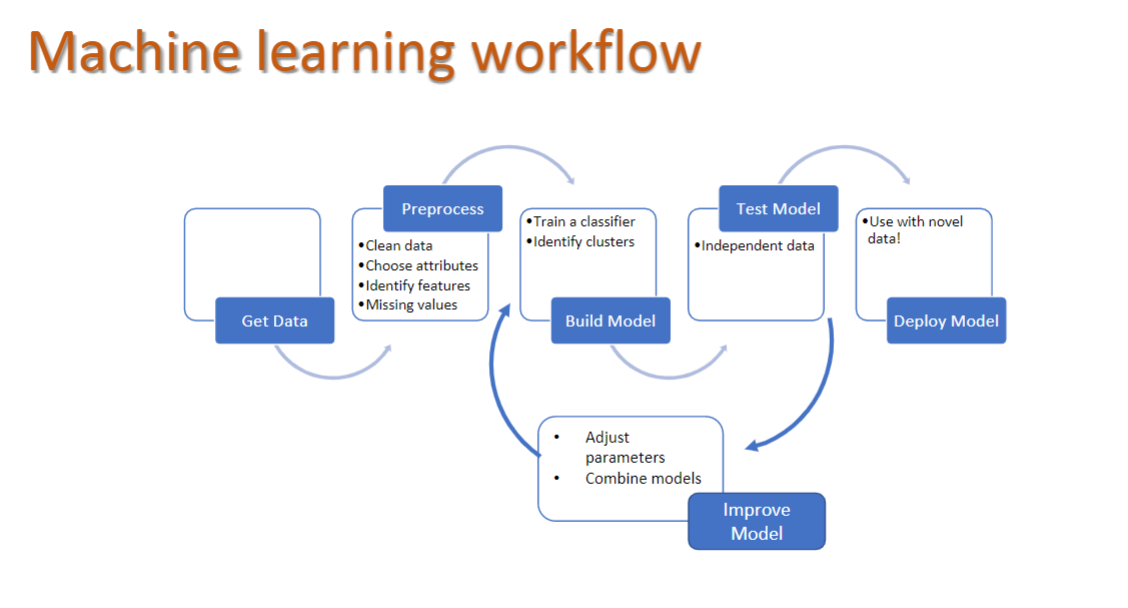



In [2]:
#Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os
import math
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import random
from sklearn.model_selection import train_test_split
import cv2
import tensorflow as tf
from sklearn.metrics import roc_curve
from keras.utils import normalize
from sklearn.metrics import accuracy_score

### Getting the data

The data has of two folders. 

1. Brain tumor 

This folder consists of 2513brain tumor MRI images.

2. Healthy

This folder consists of 2087 healthy brain MRI images. 

In [3]:
#Number of images
image_directory='Brain Tumor\\Brain Tumor Data Set\\Brain Tumor Data Set'
Categories={}

#Iterating through all the examples of brain tumor and healthy brain to check the number of images
for dir in os.listdir(image_directory):
    Categories[dir]=len(os.listdir(os.path.join(image_directory,dir)))

Categories

{'Brain Tumor': 2513, 'Healthy': 2087}

In [4]:
image_directory='Brain Tumor\\Brain Tumor Data Set\\Brain Tumor Data Set'
Categories={'Healthy':0,'Brain Tumor':1}

### Image Pre-processing using Open cv (docs.opencv.org)

This step includes converting the images to grayscale and resizing the images. 

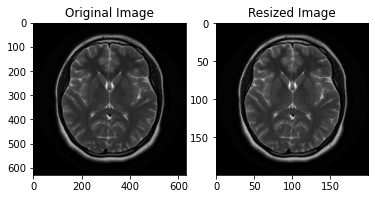

In [13]:
IMG_SIZE=200
X=[]
y=[]
for category in Categories:
    path=os.path.join(image_directory,category)#Path to brain tumor and healthy brains
    for img in os.listdir(path):
        fig, ax = plt.subplots(1,2)
        image=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)#converting to grayscale 
        ax[0].title.set_text("Original Image")
        ax[0].imshow(image,cmap='gray')
        image=cv2.resize(image,(IMG_SIZE,IMG_SIZE)) #Resizing
        ax[1].title.set_text("Resized Image")
        ax[1].imshow(image,cmap='gray')
        break
    break

### Feature Extraction

Converting to grayscale, resizing, and applying Gaussian Blur, Threshold Binary, Threshold erode and dilate, Edge Detection


In [14]:
for category in Categories:
    path=os.path.join(image_directory,category)#Path to brain tumor and healthy brains
    for img in os.listdir(path):
        image=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        image=cv2.resize(image,(IMG_SIZE,IMG_SIZE))
        X.append(image)
        y.append(Categories[category])
        histg=cv2.calcHist([image],[0],None,[256],[0,256])
        image=cv2.GaussianBlur(image,(5,5),0)
        ret, threshold_image=cv2.threshold(image, 50,255,cv2.THRESH_BINARY)
        threshold_image2=cv2.erode(threshold_image, None,iterations=1)
        threshold_image3=cv2.dilate(threshold_image, None,iterations=1)
        #Edge detection
        edges=cv2.Canny(image,100,200)

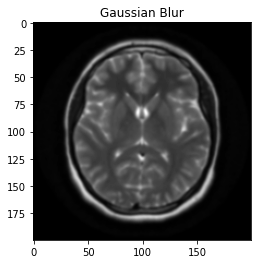

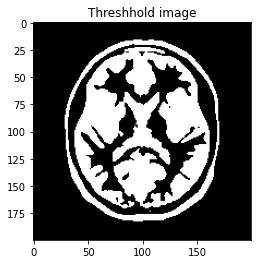

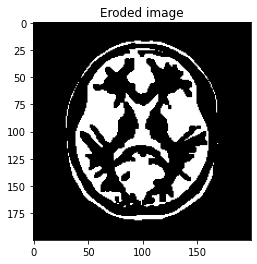

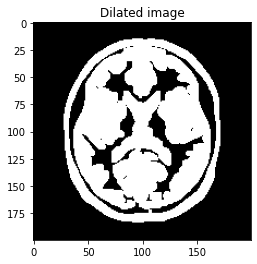

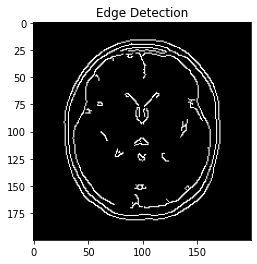

In [30]:
for category in Categories:
    path=os.path.join(image_directory,category)#Path to brain tumor and healthy brains
    for img in os.listdir(path):
        image=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        image=cv2.resize(image,(IMG_SIZE,IMG_SIZE))
        histg=cv2.calcHist([image],[0],None,[256],[0,256])
        image=cv2.GaussianBlur(image,(5,5),0)
        plt.title("Gaussian Blur")
        plt.imshow(image,cmap='gray')
        plt.show()
        ret, threshold_image=cv2.threshold(image, 50,255,cv2.THRESH_BINARY)
        plt.title("Threshhold image")
        plt.imshow(threshold_image,cmap='gray')
        plt.show()
        threshold_image2=cv2.erode(threshold_image, None,iterations=1)
        plt.title("Eroded image")
        plt.imshow(threshold_image2,cmap='gray')
        plt.show()
        threshold_image3=cv2.dilate(threshold_image, None,iterations=1)
        plt.title("Dilated image")
        plt.imshow(threshold_image3,cmap='gray')
        plt.show()
        edges=cv2.Canny(image,100,200)
        plt.title("Edge Detection")
        plt.imshow(edges,cmap='gray')
        plt.show()
        break
    break

In [31]:
X=np.array(X)
y=np.array(y)

In [32]:
pd.Series(y).value_counts()

1    2513
0    2087
dtype: int64

In [33]:
X.shape

(4600, 200, 200)

In [34]:
X_updated=X.reshape(len(X),-1)
X_updated.shape

(4600, 40000)

### Splitting data to train and test

70% Train data 20% test data.

In [39]:
#Split Data
x_train,x_test,y_train,y_test=train_test_split(X_updated,y, random_state=10, test_size=0.3)
x_train.shape, x_test.shape

((3220, 40000), (1380, 40000))

In [40]:
#Shuffle data to avoid incorrect predictions. 
random.shuffle(x_train)
#Normalizing 
x_train=normalize(x_train,axis=0)
x_test=normalize(x_test,axis=0)

## Classification models (scikit-learn.org)

### 1. Naive Bayes 

Training Score: 0.47690217391304346
Testing Score: 0.4782608695652174
Accuracy= 0.4782608695652174
[[279 137]
 [343 161]]
True Positive rate =  0.44855305466237944
False Positive rate =  0.540268456375839
Precision =  0.6706730769230769
Recall =  0.44855305466237944
F score =  0.53757225433526


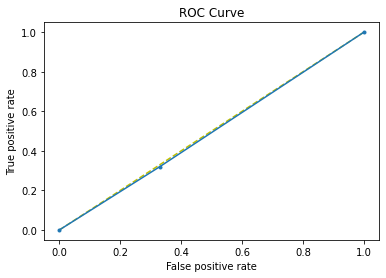

In [25]:
from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()
y_pred=gnb.fit(x_train,y_train).predict(x_test)
#Evaluation
print("Training Score:", gnb.score(x_train,y_train))
print("Testing Score:", gnb.score(x_test,y_test))

#Prediction
y_pred=gnb.predict(x_test)
print("Accuracy=",metrics.accuracy_score(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
print(cm)
precision=cm[0,0]/(cm[0,0]+cm[0,1])
recall=cm[0,0]/(cm[0,0]+cm[1,0])
print("True Positive rate = ", cm[0,0]/(cm[0,0]+cm[1,0]))
print("False Positive rate = ", cm[1,1]/(cm[0,1]+cm[1,1]))
print("Precision = ", precision )
print("Recall = ", recall)
print("F score = ", (2*precision*recall)/(precision+recall))
y_pred=gnb.predict(x_test).ravel()
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
plt.figure(1)
plt.plot([0,1],[0,1],'y--')
plt.plot(fpr,tpr,marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.show()

### 2. SVM Model

Training Score: 0.6573369565217392
Testing Score: 0.5608695652173913
Accuracy= 0.5608695652173913
[[ 42 374]
 [ 30 474]]
True Positive rate =  0.5833333333333334
False Positive rate =  0.5589622641509434
Precision =  0.10096153846153846
Recall =  0.5833333333333334
F score =  0.17213114754098363


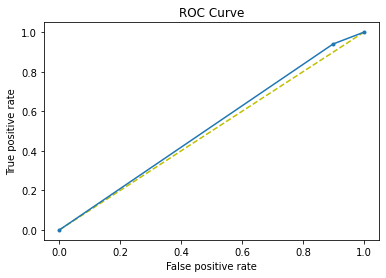

In [14]:
from sklearn import svm
sv=svm.SVC()
sv.fit(x_train,y_train)
#Evaluation
print("Training Score:", sv.score(x_train,y_train))
print("Testing Score:", sv.score(x_test,y_test))

#Prediction
y_pred=sv.predict(x_test)
print("Accuracy=",metrics.accuracy_score(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
print(cm)
precision=cm[0,0]/(cm[0,0]+cm[0,1])
recall=cm[0,0]/(cm[0,0]+cm[1,0])
print("True Positive rate = ", cm[0,0]/(cm[0,0]+cm[1,0]))
print("False Positive rate = ", cm[1,1]/(cm[0,1]+cm[1,1]))
print("Precision = ", precision )
print("Recall = ", recall)
print("F score = ", (2*precision*recall)/(precision+recall))
y_pred=sv.predict(x_test).ravel()
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
plt.figure(1)
plt.plot([0,1],[0,1],'y--')
plt.plot(fpr,tpr,marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.show()

# PART 2 CLUSTERING (scikit-learn.org)

### Elbow Method for optimal number of clusters
We already know k=2. But for the purpose of the using the clustering methods let us see what value is predicted for optimal number of clusters. 

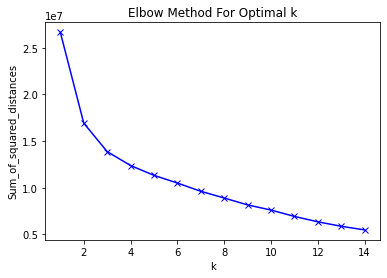

In [21]:
from sklearn.cluster import KMeans
K = range(1,15)
Sum_of_squared_distances=[]
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(image)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### Silhouette Method for optimal number of clusters

For n_clusters = 2 The average silhouette_score is : 0.415441091724495
For n_clusters = 3 The average silhouette_score is : 0.3555401452650504
For n_clusters = 4 The average silhouette_score is : 0.28298189648335187
For n_clusters = 5 The average silhouette_score is : 0.2901095788166969
For n_clusters = 6 The average silhouette_score is : 0.299048322948547


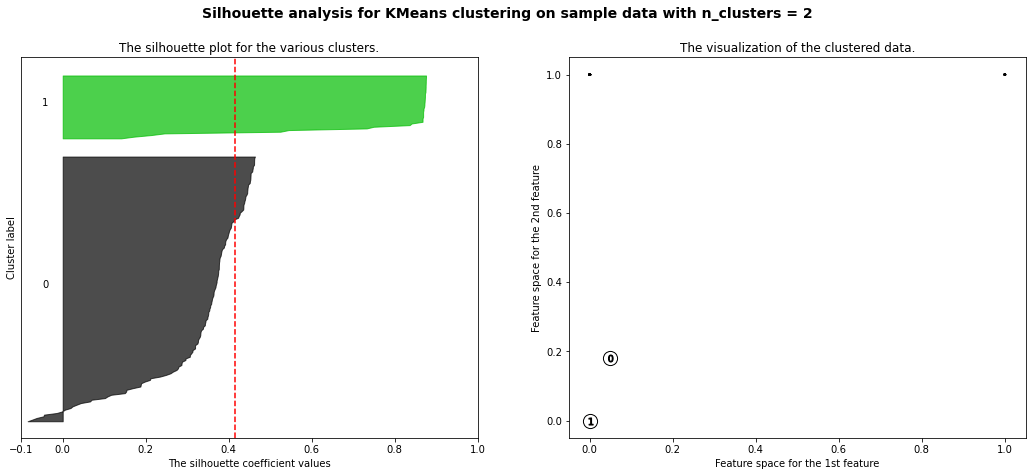

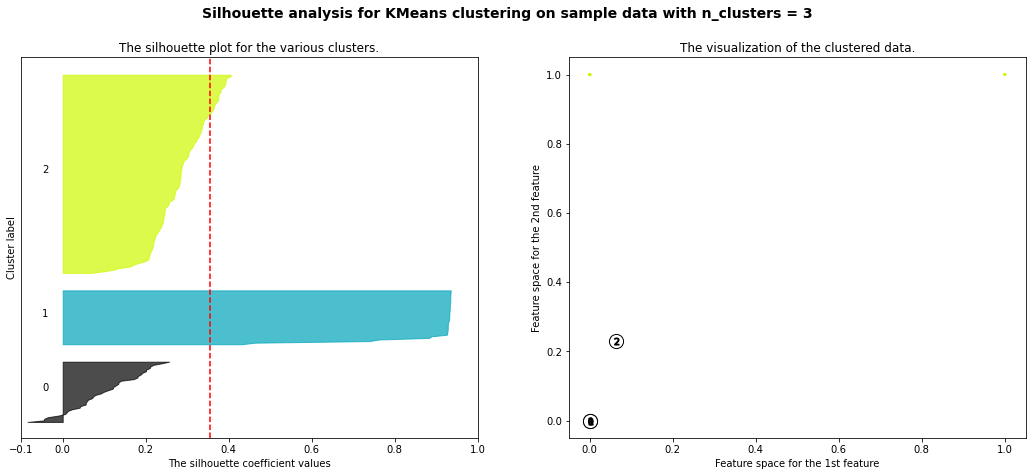

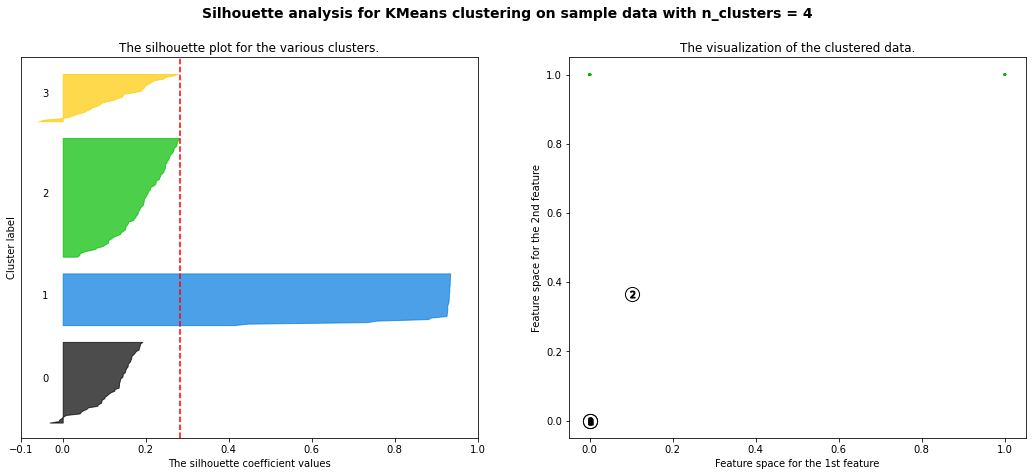

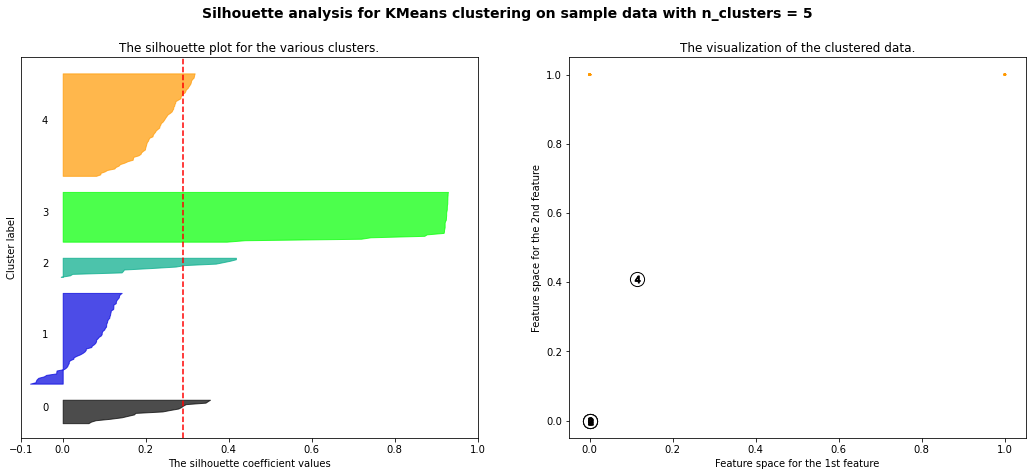

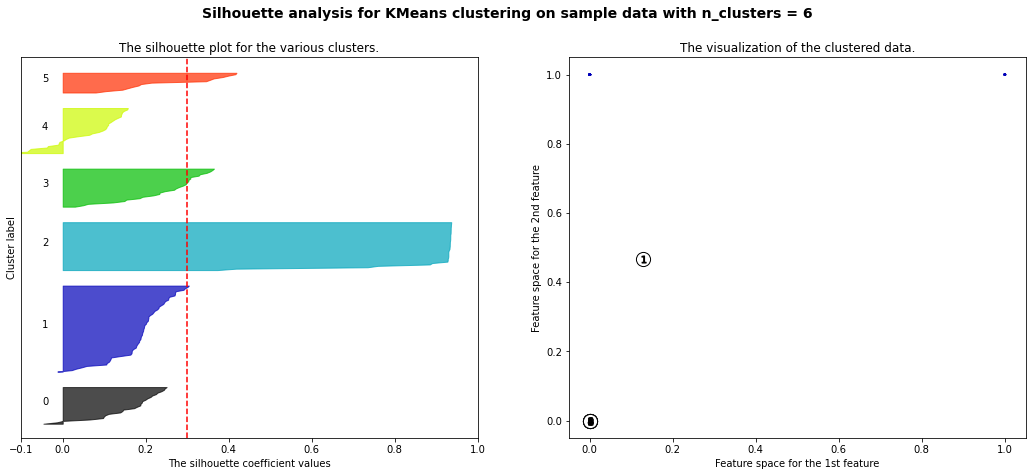

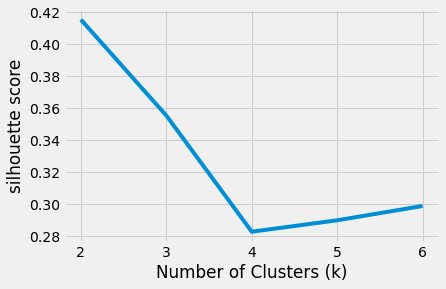

In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import matplotlib.style as style

range_n_clusters = [2, 3, 4, 5, 6]
silhouette_avg_n_clusters = []

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(image) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(image)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(image, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouette_avg_n_clusters.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(image, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(image[:, 0], image[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


style.use("fivethirtyeight")
plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.show()

### K-means clustering 

cluster 0
280 elements


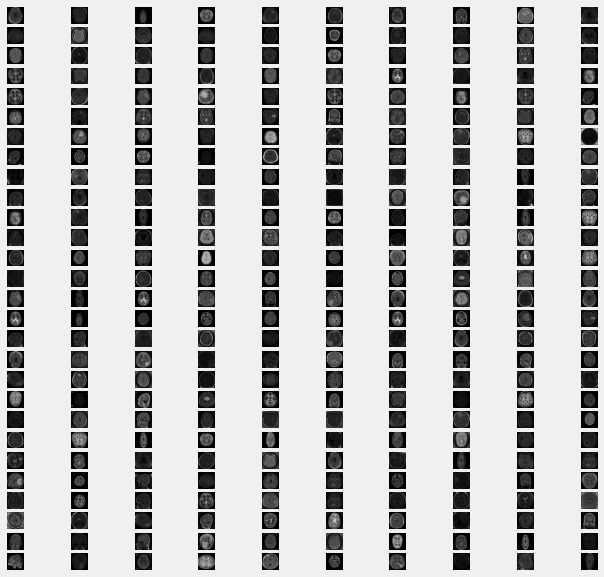

cluster 1
640 elements


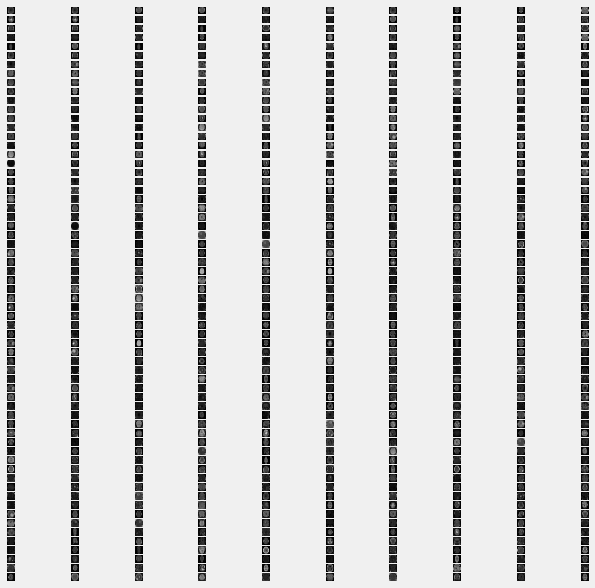

Accuracy= 0.5391304347826087
[[136 280]
 [144 360]]


In [44]:
from sklearn.cluster import KMeans
from PIL import Image
#data = 255-X
np.random.seed(1)

n = 2
#We classify the data with k-means

kmeans = KMeans(n_clusters=n,init='random')
kmeans.fit(x_train,y_train)
Z = kmeans.predict(x_test)
#We plot the resulting clusters

for i in range(0,n):

    row = np.where(Z==i)[0]  # row in Z for elements of cluster i
    num = row.shape[0]       #  number of elements for each cluster
    r = np.floor(num/10.)    # number of rows in the figure of the cluster 

    print("cluster "+str(i))
    print(str(num)+" elements")

    plt.figure(figsize=(10,10))
    for k in range(0, num):
        plt.subplot(r+1, 10, k+1)
        image = x_train[row[k], ]
        image = image.reshape(200, 200)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
    plt.show()
    
print("Accuracy=",metrics.accuracy_score(y_test,Z))
cm=confusion_matrix(y_test,Z)
print(cm)    


### KMeans clustering using opencv

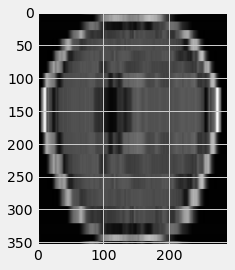

In [42]:
#For opencv2 image types needs to be float64 instead of int 64
for category in Categories:
    path=os.path.join(image_directory,category)#Path to brain tumor and healthy brains
    for img in os.listdir(path):
        image=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)

        # convert to np.float32
        Z = np.float32(image)

        # define criteria, number of clusters(K) and apply kmeans()
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
        #number of clusters
        K = 8 #change to 5 as we are dealing with pixel values here
        #attempts: flag to specify the number of times the algorithm is executed using different initial labellings
        attempts=10
        #1. (ret)compactness: sum of square of distance of each point to their corresponding centres
        #2. labels 3. center : centre of each cluster
        ret,label,center=cv2.kmeans(Z,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)

        #A high compactness score indicates that all points are close to their cluster centers, 
        #whereas a low compactness score indicates that the different clusters might not be well separated:
        # Now convert back into uint8, and make original image
        center = np.uint8(center)
        res = center[label.flatten()] #flattening the labels 
        res2 = res.reshape((image.shape)) #and reshaping them

cv2.imshow('res2',res2)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(res2,cmap='gray')
plt.show()



# PART 3 SUPERVISED LEARNING WEEK 3

#### 1. Decision trees are prone to overfitting. Show how you have investigated this problem using your data set.

One way of dealing with overfitting is by having a validation set. That is the k-fold cross validation method. Secondly, we could try by changing the parameters of the decision tree such as the depth. Pruning is also a way of handling the decision trees by reducing the size of decision trees by removing sections of the tree. It reduces the complexity of the final classifier, and hence improves predictive accuracy by the reduction of overfitting.  These methods will be implemented below. 

#### 2. Show classification results using different tree sizes. What parameters did you research that influence tree size.

### Decision Tree Classifier with depth=2

Training Score: 0.5673913043478261
Testing Score: 0.5489130434782609
Accuracy= 0.5489130434782609
[[126 290]
 [125 379]]
True Positive rate =  0.50199203187251
False Positive rate =  0.5665171898355755
Precision =  0.30288461538461536
Recall =  0.50199203187251
F score =  0.37781109445277355


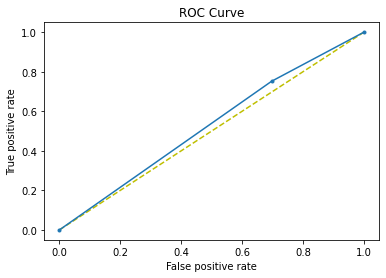

In [23]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=0, max_depth=2)
dtree.fit(x_train,y_train)
y_pred=dtree.predict(x_test)
#Evaluation
print("Training Score:", dtree.score(x_train,y_train))
print("Testing Score:", dtree.score(x_test,y_test))

#Prediction
print("Accuracy=",metrics.accuracy_score(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
print(cm)
precision=cm[0,0]/(cm[0,0]+cm[0,1])
recall=cm[0,0]/(cm[0,0]+cm[1,0])
print("True Positive rate = ", cm[0,0]/(cm[0,0]+cm[1,0]))
print("False Positive rate = ", cm[1,1]/(cm[0,1]+cm[1,1]))
print("Precision = ", precision )
print("Recall = ", recall)
print("F score = ", (2*precision*recall)/(precision+recall))
y_pred=dtree.predict(x_test).ravel()
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
plt.figure(1)
plt.plot([0,1],[0,1],'y--')
plt.plot(fpr,tpr,marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.show()

### Decision Tree Classifier with depth=4

In [24]:
dtree1 = DecisionTreeClassifier(random_state=0, max_depth=4)
dtree1.fit(x_train,y_train)
y_pred=dtree.predict(x_test)
#Evaluation
print("Training Score:", dtree1.score(x_train,y_train))
print("Testing Score:", dtree1.score(x_test,y_test))
#Prediction
print("Accuracy=",metrics.accuracy_score(y_test,y_pred))

Training Score: 0.5997282608695652
Testing Score: 0.5141304347826087
Accuracy= 0.5489130434782609


### Decision Tree Classifier with depth not mentioned

The maximum depth of the tree. 
If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

In [25]:
dtree2 = DecisionTreeClassifier()
dtree2.fit(x_train,y_train)
y_pred=dtree2.predict(x_test)
#Evaluation
print("Training Score:", dtree2.score(x_train,y_train))
print("Testing Score:", dtree2.score(x_test,y_test))
#Prediction
print("Accuracy=",metrics.accuracy_score(y_test,y_pred))

Training Score: 0.7744565217391305
Testing Score: 0.5315217391304348
Accuracy= 0.5315217391304348


#### 3. Show experiments using cross validation and different train-test splits.

In [27]:
#Before we worked with 70% train data and 30% test data now we change it to 80:20
x_train,x_test,y_train,y_test=train_test_split(X_updated,y, random_state=10, test_size=0.2)
from sklearn.model_selection import cross_val_score
cross_val_score(dtree, x_train, y_train, cv=2, scoring='accuracy')

array([0.49728261, 0.48315217])

In [31]:
#Data splitting by giving 70% train data and 30% test data
cross_val_score(dtree, x_train, y_train, cv=2, scoring='accuracy')

array([0.51242236, 0.53726708])

Training Score: 0.5683229813664596
Testing Score: 0.5384057971014493
Accuracy= 0.5384057971014493
[[171 466]
 [171 572]]
True Positive rate =  0.5
False Positive rate =  0.5510597302504817
Precision =  0.2684458398744113
Recall =  0.5
F score =  0.34933605720122574


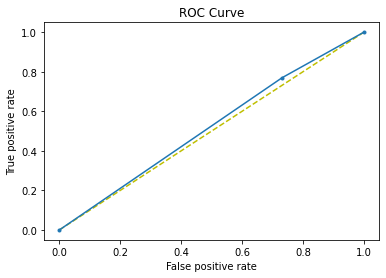

In [30]:
dtree = DecisionTreeClassifier(random_state=0, max_depth=2)
dtree.fit(x_train,y_train)
y_pred=dtree.predict(x_test)
#Evaluation
print("Training Score:", dtree.score(x_train,y_train))
print("Testing Score:", dtree.score(x_test,y_test))
#Prediction
print("Accuracy=",metrics.accuracy_score(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
print(cm)
precision=cm[0,0]/(cm[0,0]+cm[0,1])
recall=cm[0,0]/(cm[0,0]+cm[1,0])
print("True Positive rate = ", cm[0,0]/(cm[0,0]+cm[1,0]))
print("False Positive rate = ", cm[1,1]/(cm[0,1]+cm[1,1]))
print("Precision = ", precision )
print("Recall = ", recall)
print("F score = ", (2*precision*recall)/(precision+recall))
y_pred=dtree.predict(x_test).ravel()
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
plt.figure(1)
plt.plot([0,1],[0,1],'y--')
plt.plot(fpr,tpr,marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.show()

### Random Forest Classifier

Training Score: 0.7845108695652174
Testing Score: 0.525
Accuracy= 0.525
[[196 220]
 [217 287]]
True Positive rate =  0.4745762711864407
False Positive rate =  0.5660749506903353
Precision =  0.47115384615384615
Recall =  0.4745762711864407
F score =  0.4728588661037395


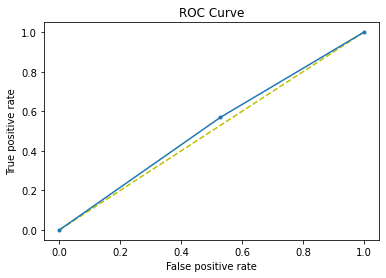

In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=25,random_state=42)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)

#Evaluation
print("Training Score:", rfc.score(x_train,y_train))
print("Testing Score:", rfc.score(x_test,y_test))

#Prediction
print("Accuracy=",metrics.accuracy_score(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
print(cm)
precision=cm[0,0]/(cm[0,0]+cm[0,1])
recall=cm[0,0]/(cm[0,0]+cm[1,0])
print("True Positive rate = ", cm[0,0]/(cm[0,0]+cm[1,0]))
print("False Positive rate = ", cm[1,1]/(cm[0,1]+cm[1,1]))
print("Precision = ", precision )
print("Recall = ", recall)
print("F score = ", (2*precision*recall)/(precision+recall))
y_pred=rfc.predict(x_test).ravel()
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
plt.figure(1)
plt.plot([0,1],[0,1],'y--')
plt.plot(fpr,tpr,marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.show()

### K-Nearest Neighbour

0.5282608695652173

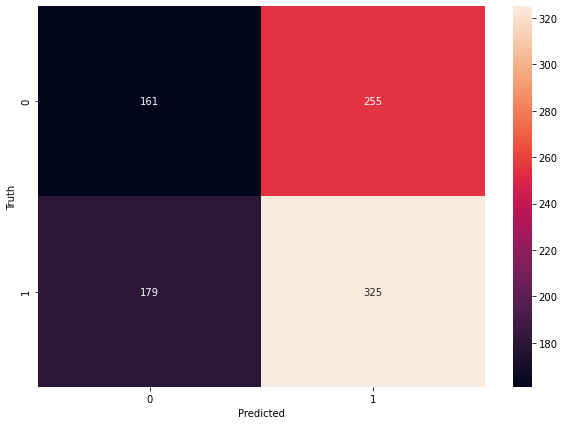

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred=knn.predict(x_test)
cmkn = confusion_matrix(y_test , y_pred)
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cmkn ,annot=True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
knn.score(x_test,y_test)

## Models with their Accuracies

SVM: 56.09%

Decision Tree: 54.89%

K-Means: 53.91%

K-Nearest Neighbour: 52.82%

Random Forest: 52.5%

Naive Bayes: 47.83%